In [27]:
import pandas as pd 


In [28]:
#first I will begin with checking if the data is balanced or not I will be working on the Z_score csv
data=pd.read_csv("D:\DownLoad\projects\Auto_learn\data\winsorization.csv")
df=pd.DataFrame(data).drop(columns="Unnamed: 0")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   syn_error_rate                          14036 non-null  float64
 1   connection_time                         14036 non-null  int64  
 2   destination_same_source_port_rate       14036 non-null  float64
 3   destination_different_server_rate       14036 non-null  float64
 4   connection_status                       14036 non-null  object 
 5   connection_count                        14036 non-null  int64  
 6   destination_server_different_host_rate  14036 non-null  float64
 7   suspicious_activity                     14036 non-null  int64  
 8   protocol                                14036 non-null  object 
 9   server_different_host_rate              14036 non-null  float64
 10  destination_server_syn_error_rate       14036 non-null  fl

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Omar\AppData\Local\Temp\ipykernel_13888\3793971385.py:2: SyntaxWarning: invalid escape sequence '\D'
  data=pd.read_csv("D:\DownLoad\projects\Auto_learn\data\winsorization.csv")


In [29]:
df.head()

,syn_error_rate,connection_time,destination_same_source_port_rate,destination_different_server_rate,connection_status,connection_count,destination_server_different_host_rate,suspicious_activity,protocol,server_different_host_rate,...,destination_server_reset_error_rate,server_reset_error_rate,server_syn_error_rate,destination_bytes,guest_login,authentication_status,destination_host_count,destination_reset_error_rate,different_server_rate,class
0,0.0,0,0.01,0.00,SF,2,0.0,0,tcp,0.0,...,0.0,0.0,0.0,4702.625,0,1,87,0.0,0.0,anomaly
1,0.0,0,0.00,0.05,S0,36,0.0,0,tcp,0.0,...,0.0,0.0,0.0,0.000,0,0,255,0.0,0.0,anomaly
2,0.0,0,0.00,0.05,S0,36,0.0,0,tcp,0.0,...,0.0,0.0,0.0,0.000,0,0,255,0.0,0.0,anomaly
3,0.0,0,0.00,0.05,S0,36,0.0,0,tcp,0.0,...,0.0,0.0,0.0,0.000,0,0,255,0.0,0.0,anomaly
4,0.0,0,0.00,0.05,S0,36,0.0,0,tcp,0.0,...,0.0,0.0,0.0,0.000,0,0,255,0.0,0.0,anomaly


In [30]:
object_col_names=[]
for col in df.select_dtypes(include=['object']).columns : 
    object_col_names.append(col)

In [31]:
print(object_col_names)

['connection_status', 'protocol', 'service_type', 'class']


In [32]:
# print(df['connection_status'].value_counts(),"\n")
# print(df['service_type'].value_counts(),"\n")
# print(df['protocol'].value_counts(),"\n")
print(df['class'].value_counts(),"\n")

class
normal     13449
anomaly      587
Name: count, dtype: int64 



In [33]:
# we need to encode the object data and deal with the imbalance 
from sklearn.preprocessing import LabelEncoder


In [34]:
#We will begin with encoding the data 
le=LabelEncoder()
for col in df.select_dtypes(include="object").columns :
    df[col]=le.fit_transform(df[col])
    
print(df.head())

   syn_error_rate  connection_time  destination_same_source_port_rate  \
0             0.0                0                               0.01   
1             0.0                0                               0.00   
2             0.0                0                               0.00   
3             0.0                0                               0.00   
4             0.0                0                               0.00   

   destination_different_server_rate  connection_status  connection_count  \
0                               0.00                  9                 2   
1                               0.05                  5                36   
2                               0.05                  5                36   
3                               0.05                  5                36   
4                               0.05                  5                36   

   destination_server_different_host_rate  suspicious_activity  protocol  \
0                     

In [35]:
#checking for the value counts of the object 
for col in object_col_names : 
    print(df[col].value_counts())


connection_status
9    12781
1      591
5      439
6       86
2       58
4       47
7       17
8       15
3        1
0        1
Name: count, dtype: int64
protocol
1    11179
2     2534
0      323
Name: count, dtype: int64
service_type
22    7588
11    1817
48    1391
19    1022
39     533
      ... 
42       1
37       1
40       1
34       1
47       1
Name: count, Length: 62, dtype: int64
class
1    13449
0      587
Name: count, dtype: int64


In [36]:
print(df['class'].value_counts())

class
1    13449
0      587
Name: count, dtype: int64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   syn_error_rate                          14036 non-null  float64
 1   connection_time                         14036 non-null  int64  
 2   destination_same_source_port_rate       14036 non-null  float64
 3   destination_different_server_rate       14036 non-null  float64
 4   connection_status                       14036 non-null  int64  
 5   connection_count                        14036 non-null  int64  
 6   destination_server_different_host_rate  14036 non-null  float64
 7   suspicious_activity                     14036 non-null  int64  
 8   protocol                                14036 non-null  int64  
 9   server_different_host_rate              14036 non-null  float64
 10  destination_server_syn_error_rate       14036 non-null  fl

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns 

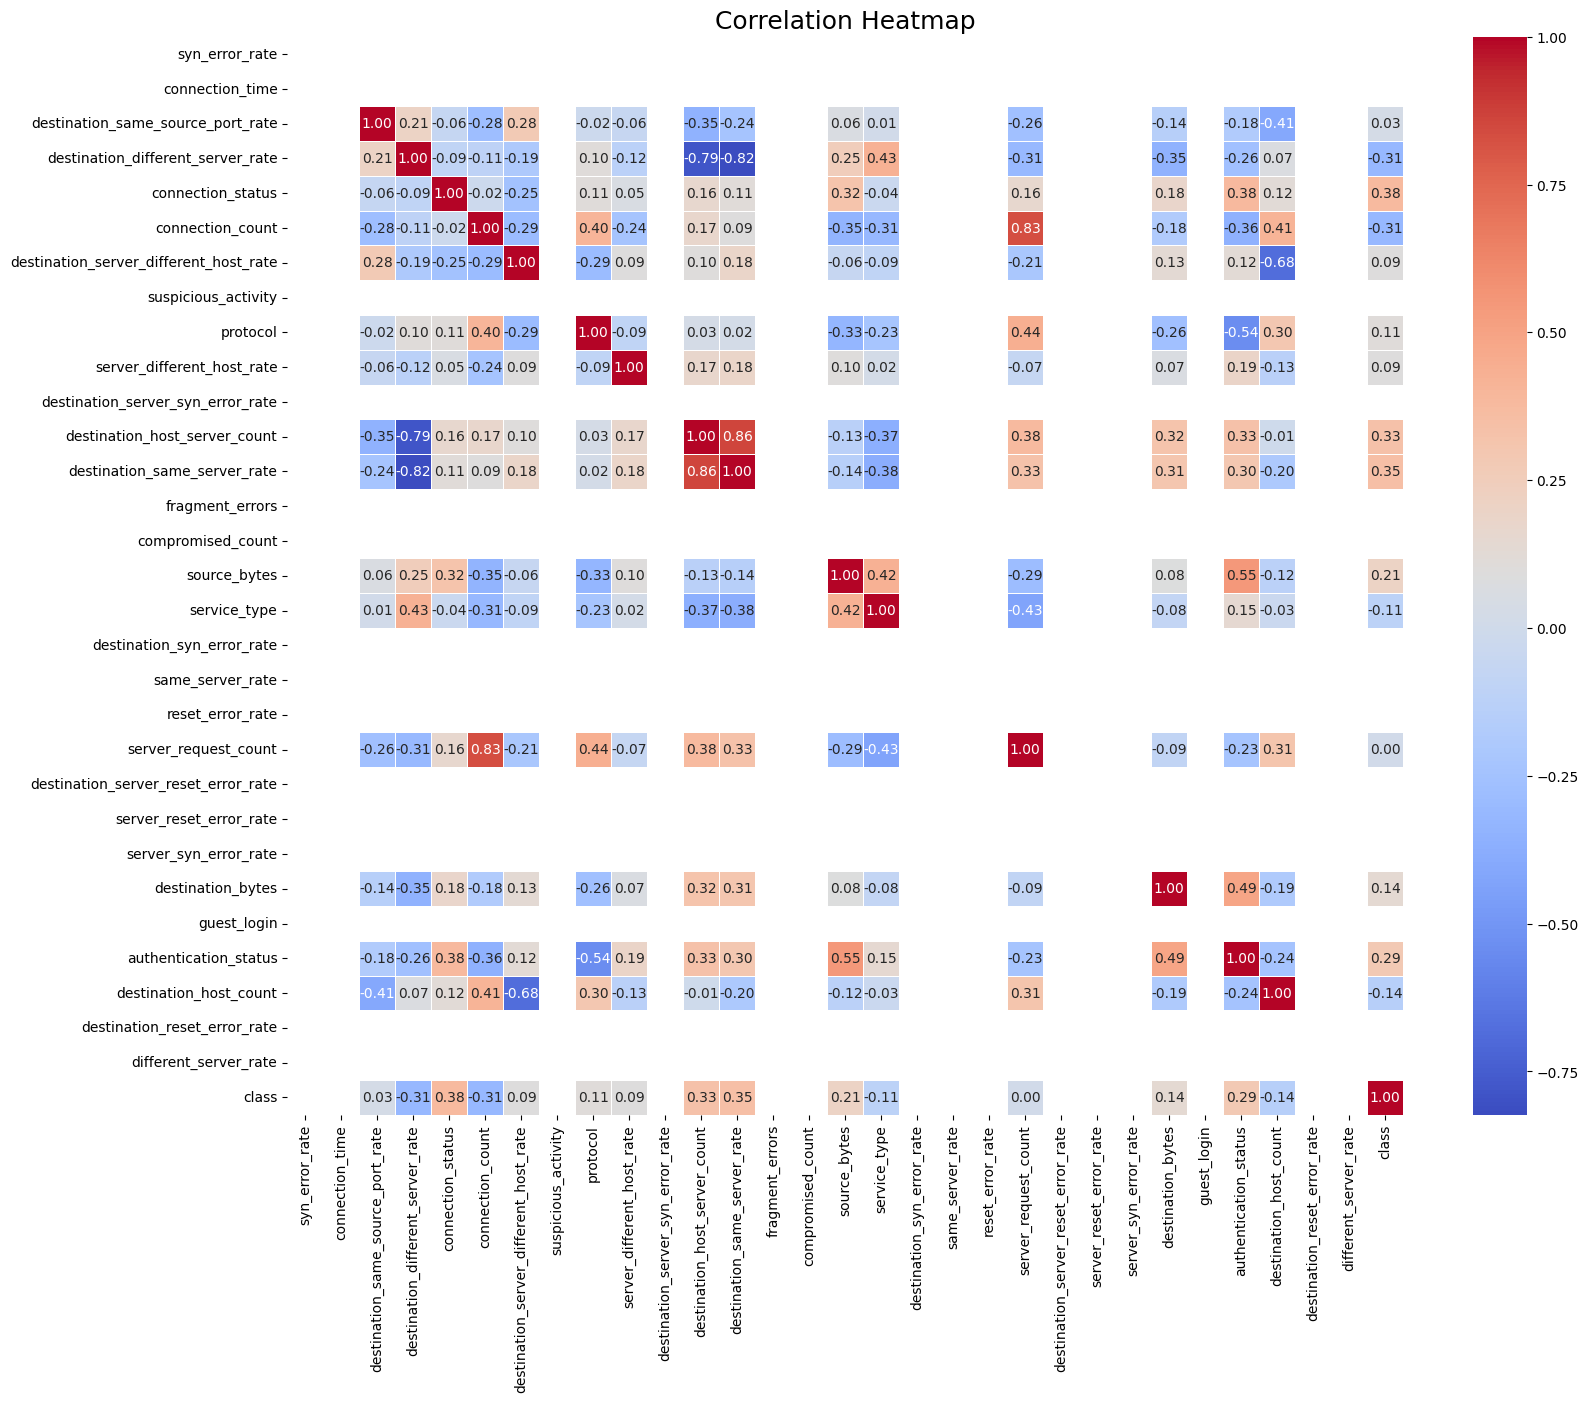

In [39]:
# we will begin by viualizing the corr of the df  to choose between the features
correlation_matrix = df.corr()


plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.show()

In [40]:
corr=df.corr()
target=corr['class'].abs()
corr_threshhold=0.01
rel_features=target[target>corr_threshhold].index
Feature_selected_df=df[rel_features]

In [41]:
Feature_selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   destination_same_source_port_rate       14036 non-null  float64
 1   destination_different_server_rate       14036 non-null  float64
 2   connection_status                       14036 non-null  int64  
 3   connection_count                        14036 non-null  int64  
 4   destination_server_different_host_rate  14036 non-null  float64
 5   protocol                                14036 non-null  int64  
 6   server_different_host_rate              14036 non-null  float64
 7   destination_host_server_count           14036 non-null  int64  
 8   destination_same_server_rate            14036 non-null  float64
 9   source_bytes                            14036 non-null  float64
 10  service_type                            14036 non-null  in

In [42]:
X=Feature_selected_df.drop(columns="class")
Y=Feature_selected_df['class']

In [43]:
# we will begin with fixing the imbalance 
from imblearn.over_sampling import SMOTE

In [44]:
smote=SMOTE()
X_resample , Y_resample =smote.fit_resample(X,Y)



In [45]:
Y_resample.value_counts()


class
0    13449
1    13449
Name: count, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# We split the data first 
X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2)

In [48]:
# then we scale since I have removed all the outliers I will be using the Standard scaller
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

In [49]:
# we begin implementing our first model the KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score ,recall_score ,f1_score


In [50]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
ypred_knn=knn.predict(X_test)
knn_accuracy=accuracy_score(Y_test,ypred_knn)
knn_percision=precision_score(Y_test,ypred_knn)
knn_recall=recall_score(Y_test,ypred_knn)
knn_f1=f1_score(Y_test,ypred_knn)
print("accuracy : ",knn_accuracy)
print("percision : ", knn_percision)
print("recall_score : ",knn_recall)
print("f1score: ",knn_f1)



accuracy :  0.9971509971509972
percision :  0.9970260223048327
recall_score :  1.0
f1score:  0.9985107967237528


In [51]:
# Implementing the second model 
from sklearn.linear_model import LogisticRegression


In [52]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
ypred_logreg=logreg.predict(X_test)
logreg_accuracy=accuracy_score(Y_test,ypred_logreg)
logreg_percision=precision_score(Y_test,ypred_logreg)
logreg_recall=recall_score(Y_test,ypred_logreg)
logreg_f1=f1_score(Y_test,ypred_logreg)
print("accuracy : ",logreg_accuracy)
print("percision : ", logreg_percision)
print("recall_score : ",logreg_recall)
print("f1score: ",logreg_f1)


accuracy :  0.9882478632478633
percision :  0.9925622908144291
recall_score :  0.9951528709917972
f1score:  0.9938558927574008


In [ ]:
#we implement the SVM 
from sklearn.svm import SVC


In [57]:
svm=SVC()
svm.fit(X_train,Y_train)
ypred_svm=svm.predict(X_test)
svm_acurracy=accuracy_score(Y_test,ypred_svm)
svm_precision=precision_score(Y_test,ypred_svm)
svm_recall=recall_score(Y_test,ypred_svm)
svm_f1=f1_score(Y_test,ypred_svm)
print("accuracy_score : ",svm_acurracy)
print("precision_score : ",svm_precision)
print("recall_score : ",svm_recall)
print("F1_score : ",svm_f1)


accuracy_score :  0.9967948717948718
precision_score :  0.9966555183946488
recall_score :  1.0
F1_score :  0.998324958123953


In [53]:
#we implement the Desecion tree 
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
ypred_Dt=dt.predict(X_test)
Dt_acurracy=accuracy_score(Y_test,ypred_Dt)
Dt_precision=precision_score(Y_test,ypred_Dt)
Dt_recall=recall_score(Y_test,ypred_Dt)
Dt_f1=f1_score(Y_test,ypred_Dt)
print("accuracy_score : ",Dt_acurracy)
print("precision_score : ",Dt_precision)
print("recall_score : ",Dt_recall)
print("F1_score : ",Dt_f1)

accuracy_score :  0.9932336182336182
precision_score :  0.9977570093457944
recall_score :  0.9951528709917972
F1_score :  0.9964532387530334


In [58]:
# We implement the Random Forest
from sklearn.ensemble import RandomForestClassifier


In [59]:
Rt=RandomForestClassifier()
Rt.fit(X_train,Y_train)
ypred_Rt=Rt.predict(X_test)
Rt_acurracy=accuracy_score(Y_test,ypred_Rt)
Rt_precision=precision_score(Y_test,ypred_Rt)
Rt_recall=recall_score(Y_test,ypred_Rt)
Rt_f1=f1_score(Y_test,ypred_Rt)
print("accuracy_score : ",Rt_acurracy)
print("precision_score : ",Rt_precision)
print("recall_score : ",Rt_recall)
print("F1_score : ",Rt_f1)


accuracy_score :  0.9964387464387464
precision_score :  0.9970238095238095
recall_score :  0.9992542878448919
F1_score :  0.9981378026070763
